In [1]:
print("hi Ryoka")

hi Ryoka


/var/folders/xm/__v5hm6145gg4qqqd8gf3fbw0000gn/T/ipykernel_738/3443659904.py:38: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=10.
  ani = animation.FuncAnimation(


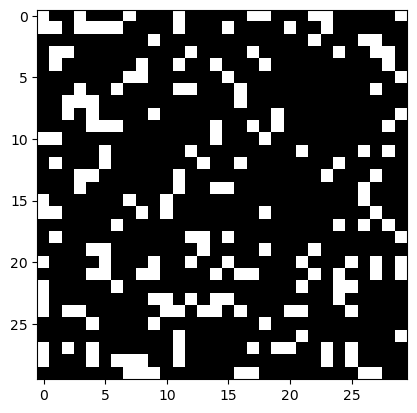

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def initialize_grid(rows, cols, density=0.2):
    return np.random.choice([0, 1], size=(rows, cols), p=[1 - density, density])

def update_grid(grid, survival_rules=(2, 3), birth_rule=3):
    rows, cols = grid.shape
    new_grid = grid.copy()

    for i in range(rows):
        for j in range(cols):
            neighbors_sum = np.sum(grid[max(0, i-1):min(rows, i+2), max(0, j-1):min(cols, j+2)]) - grid[i, j]
            if grid[i, j] == 1 and (neighbors_sum < survival_rules[0] or neighbors_sum > survival_rules[1]):
                new_grid[i, j] = 0
            elif grid[i, j] == 0 and neighbors_sum == birth_rule:
                new_grid[i, j] = 1

    return new_grid

def update(frameNum, img, grid, rows, cols, survival_rules, birth_rule):
    new_grid = update_grid(grid, survival_rules, birth_rule)
    img.set_array(new_grid)
    grid[:] = new_grid[:]
    return img,

def main():
    rows, cols = 30, 30
    density = 0.2
    survival_rules = (2, 3)
    birth_rule = 3

    grid = initialize_grid(rows, cols, density)

    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest', cmap='gray')
    ani = animation.FuncAnimation(
        fig, update, fargs=(img, grid, rows, cols, survival_rules, birth_rule),
        frames=10, interval=200, save_count=50
    )

    plt.show()

if __name__ == '__main__':
    main()
